# Assignment group 2: Network and exploratory data analysis

## Module B _(64 pts)_ Data Visualization and Interpretation
We have two goals for this exercise:
    
1. Summarization through measures of commonality, centrality, variation, association, and regularity.
2. Visualization through succicnt and intuitive representations that allow you to see all of the data.
    
The dataset we will be using is Philly's employees salary Dataset:

- https://www.opendataphilly.org/dataset/employee-salaries-overtime/resource/e97432a2-a6a7-466e-9025-32a1da4b14e5

also packaged in the assignment's data directory for conveniience:

```
./data/employee_salaries.csv
```

We will be using some native `pandas` and `matplotlib` to summarize and visualize the dataset. Some of the questions expect you to review the lecture notes. There are also some new methods and techniques introduced in this Module. Please feel free to be creative when answering the questions.

### Note on hypothesis generation
We'll start looking at univariate distribution of the columns to understand what is in our dataset, and eventually use biavariate and multivariate analysis to explore existing hypotheses. However, in some instances it's the new hypotheses that arise from these visualizations that are the most insightful!

So, as you answer the questions and create visualizations, please make a note any hypotheses or conclusions you can draw from your observations. These visualization methods not only help you understand what is in your data, but also become initial insights in determining the existing relationships that exist between attributes in the data.

__B1.__ _(2 pts)_ To start, load the dataset with `pandas` into a dataframe and print its `.head()` and `tail()`. Do the lines output make sense?

In [1]:
import pandas as pd
salaries = pd.read_csv("data/employee_salaries.csv", header = 0)
print(salaries.head())
print(salaries.tail())

   objectid  calendar_year  quarter   last_name first_name  \
0         1           2016        1  CHILIBERTI   ROSEMARY   
1         2           2016        1       SMITH       KARI   
2         3           2016        1   BRUMSKILL     SANDRA   
3         4           2016        1   ALEXANDER   KHADEJAH   
4         5           2016        1        HILL       SEAN   

                              title                  department  \
0                ADM TECHNICIAN III          COMMON PLEAS COURT   
1                 SENIOR CREW CHIEF  MANAGING DIRECTOR'S OFFICE   
2             SCHOOL CROSSING GUARD           POLICE DEPARTMENT   
3  CLERK TEMPORARY-SUMMER-$7.00/HR.          COMMON PLEAS COURT   
4               PROBATION OFFICER 2          COMMON PLEAS COURT   

   annual_salary  ytd_overtime_gross  
0        50543.0                 0.0  
1        34842.0                 0.0  
2            0.0                 0.0  
3            0.0                 0.0  
4        56206.0             

_Do the lines output make sense?_
The data has a field "ObjectID" which appears to have the same functionality as the index, although it begins with 1. Also the ObjectID number doesnt always increase by 1. This field might not be very useful in analysing the data. 

__B2.__ _(3 pts)_ Determine and print the number of years represented by the dataset, the number of unique departments, and the number of titles that exist across the dataset. 

 

In [2]:
print("number of years = ",salaries['calendar_year'].nunique())

number of years =  3


In [3]:
print("number of departments = ",salaries['department'].nunique())

number of departments =  57


In [4]:
print("number of titles = ",salaries['title'].nunique())

number of titles =  1965


__B3.__ _(2 pts)_ For this assignment, we will restrict to five departments with some of the highest number of employees, but they should be more or less of the same scale to get started. Since the Police Department has three times as many as the other top 6 departments, we'll ignore them (the Police) for now. In particular, determine which the _top 6_ are, print out their number os employees, and store the top 2&ndash;6 in `list` called `departments`.

In [5]:
b = salaries.groupby('department')['last_name'].count().sort_values(ascending = False)
#for item in b.index[1:6]:
print(b[1:6])
departments = b.index[1:6]
departments

department
COMMON PLEAS COURT       28081
FIRE DEPARTMENT          28011
PHILA. PRISONS           24838
WATER DEPARTMENT         23566
RECREATION DEPARTMENT    21269
Name: last_name, dtype: int64


Index(['COMMON PLEAS COURT', 'FIRE DEPARTMENT', 'PHILA. PRISONS',
       'WATER DEPARTMENT', 'RECREATION DEPARTMENT'],
      dtype='object', name='department')

__B4.__ _(3 pts)_ Next, restrict the data to just those rows corresponding to the departments determined in __B3__ and exhibit how the data have been restricted to just these.

[Hint. use your `departments` to create a boolean mask for the rows.]

In [6]:
top_salaries = salaries[salaries['department'].isin(departments)]
top_salaries

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross
0,1,2016,1,CHILIBERTI,ROSEMARY,ADM TECHNICIAN III,COMMON PLEAS COURT,50543.0,0.00
3,4,2016,1,ALEXANDER,KHADEJAH,CLERK TEMPORARY-SUMMER-$7.00/HR.,COMMON PLEAS COURT,0.0,0.00
4,5,2016,1,HILL,SEAN,PROBATION OFFICER 2,COMMON PLEAS COURT,56206.0,0.00
6,7,2016,1,SETTLES,LINDA,SENIOR COURT REPORTER,COMMON PLEAS COURT,66469.0,0.00
8,9,2016,1,BALL,JAMES,RECREATION LEADER 2,RECREATION DEPARTMENT,58126.0,0.00
9,10,2016,1,MANZONI,LOUIS,TIPSTAFF 1 (GENERAL),COMMON PLEAS COURT,44605.0,0.00
11,12,2016,1,DUGAN,KATHY,CLERK 3,WATER DEPARTMENT,39792.0,0.00
14,15,2016,1,DIVON,PETER,DIRECTOR I,COMMON PLEAS COURT,81082.0,0.00
19,20,2016,1,SMITH,ERIN,RECREATION SPECIALTY INSTRUCTOR,RECREATION DEPARTMENT,0.0,0.00
20,21,2016,1,TEMPLE,CYNTHIA,UTIL ENT FUND AC MGR,RECREATION DEPARTMENT,89378.0,0.00


In [7]:
top_s =sum(top_salaries['department'].value_counts())
s = sum(salaries['department'].value_counts())
print("percentage of top departments" ,round(top_s/s,2))

percentage of top departments 0.37


__B5.__ _(5 pts)_ For our analysis, it may be interesting to have knowledge of employee gender, but these data are not a part of those distributed. So, download the `gender_guesser` module using your package manager of choice, e.g.:
```
>>> pip install gender_guesser
```
This module predicts gender based on first name&mdash;read up more about this package (see https://pypi.org/project/gender-guesser/), it can be very useful for feature engineering!

Once you've accessed the package's contents, initialize the `gender_guesser.detector.Detector()` class for case insensitivity (`case_sensitive=False`), and apply the resulting instance's `.get_gender()` method to the `'first_name'` column of the assignment data and combine the `'male'` with `'mostly male'` and `'female'` with the `'mostly female'` output in a new column called `'gender'`.

When this is all complete, print the percentage of the dataset now labeled `'male'` and `'female'`.

In [9]:
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)


def gender_func(it):
    gen = d.get_gender(str(it))
    if gen == "male":
        return "male"
    if gen == "mostly_male":
        return "male"
    if gen == "female":
        return "female"
    if gen == "mostly_female":
        return "female"

L = []
for x in top_salaries.first_name:
    L.append(gender_func(x))

top_salaries.loc[ : , 'gender'] = L

top_salaries

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender
0,1,2016,1,CHILIBERTI,ROSEMARY,ADM TECHNICIAN III,COMMON PLEAS COURT,50543.0,0.00,female
3,4,2016,1,ALEXANDER,KHADEJAH,CLERK TEMPORARY-SUMMER-$7.00/HR.,COMMON PLEAS COURT,0.0,0.00,None
4,5,2016,1,HILL,SEAN,PROBATION OFFICER 2,COMMON PLEAS COURT,56206.0,0.00,male
6,7,2016,1,SETTLES,LINDA,SENIOR COURT REPORTER,COMMON PLEAS COURT,66469.0,0.00,female
8,9,2016,1,BALL,JAMES,RECREATION LEADER 2,RECREATION DEPARTMENT,58126.0,0.00,male
9,10,2016,1,MANZONI,LOUIS,TIPSTAFF 1 (GENERAL),COMMON PLEAS COURT,44605.0,0.00,male
11,12,2016,1,DUGAN,KATHY,CLERK 3,WATER DEPARTMENT,39792.0,0.00,female
14,15,2016,1,DIVON,PETER,DIRECTOR I,COMMON PLEAS COURT,81082.0,0.00,male
19,20,2016,1,SMITH,ERIN,RECREATION SPECIALTY INSTRUCTOR,RECREATION DEPARTMENT,0.0,0.00,female
20,21,2016,1,TEMPLE,CYNTHIA,UTIL ENT FUND AC MGR,RECREATION DEPARTMENT,89378.0,0.00,female


__B6.__ _(2 pts)_ Here, your job is to calculate the distribution of qaurters, i.e., the percentge of the remaining data that fall into the four different values held by the `quarter` column. You should be able to answer if each value actually makes up a 'quarter' of the data?

\[Hint. You can take a quick look at the distribution by using `.value_counts()` method. This could also be helpful for part __B4__!\]

In [13]:
import numpy as np

top_salaries.groupby('quarter').agg(lambda x: np.percentile(x, 50,axis = 0))


,objectid,calendar_year,annual_salary,ytd_overtime_gross
quarter,,,,
1,142760.0,2017,47310.0,268.800
2,173922.5,2017,47196.0,643.455
3,205267.5,2017,47310.0,604.130
4,387198.5,2017,47310.0,1876.025


__B7.__ _(7 pts)_ Now, write a function called `barplot(df, column, title, top = 5)`, designed to take a `column` name from the dataframe `df` corresponding to a _categorical_ variable, like `'department'`. This function should create a bar plot for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

__Important.__ The `top` argument specifies the number of `top` ocurring categories to display on the bar plot. This makes it possible to select how much of the distribution to observe!

When this is complete, exhibit your functions output on the various categorical columns in the dataset, but don't try and apply it to a numeric column!

\[Hint. Use the dataframe `.value_counts()` and `.head()` methods for convenience!\]

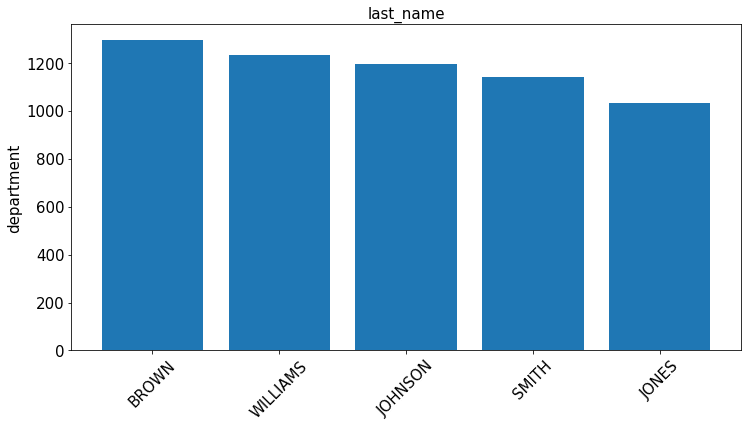

In [15]:
from matplotlib import pyplot as plt
def barplot(df, column, title, top):
    sort_df = df.groupby(title)[column].count().sort_values(ascending = False)
    bar_fig = plt.figure(figsize = (12, 6))
    
    _  = plt.bar(
        x = range(1, top + 1),height = sort_df[0:top], tick_label = sort_df.index[0:top])

    plt.tick_params(labelsize = 15)

    _ = plt.title(title, fontsize = 15)
    _ = plt.ylabel(column, fontsize = 15)
    _ = plt.xticks(rotation = 45)
    
barplot(top_salaries,'department','last_name',5)

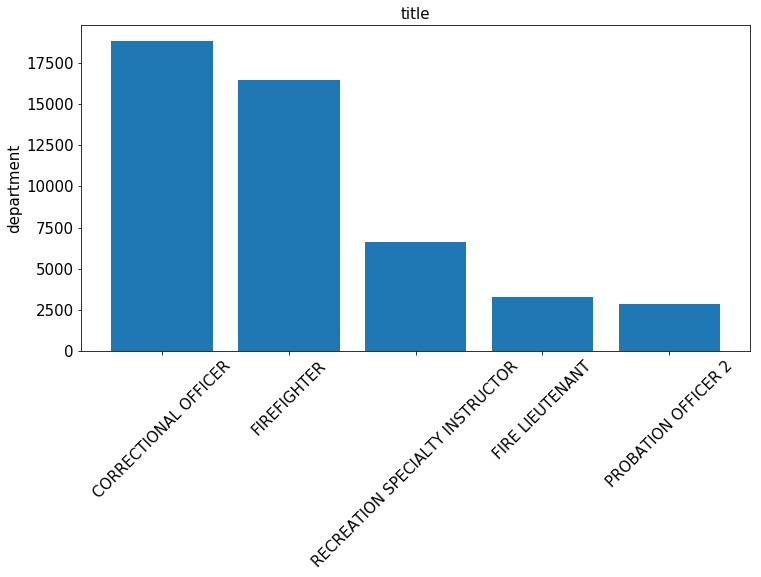

In [16]:
barplot(top_salaries,'department','title',5)

__B8.__ _(5 pts)_ Here, we'll do the same thing but now for histograms and the numeric columns. In particular, write a function called `histogram(df, column, title)`, designed to take a `column` name from the dataframe `df` corresponding to a _numeric_ variable, like `'annual_salary'`. This function should create a histogram for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

When this is complete, exhibit your functions output on the various numeric columns in the dataset, but don't try and apply it to a categorical column!

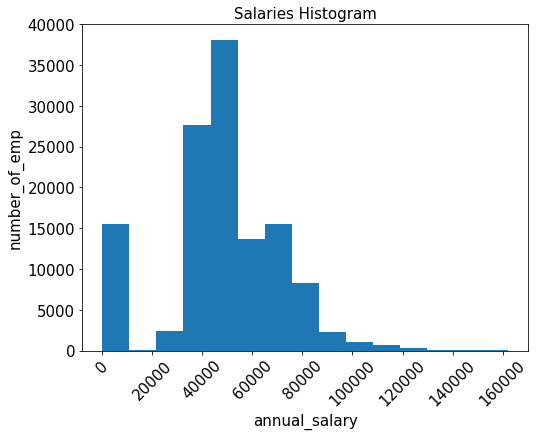

In [17]:
def histogram(df, column, title):
    hist_fig = plt.figure(figsize = (8, 6))

    _  = plt.hist(df[column], bins = 15)

    plt.tick_params(labelsize = 15)

    _ = plt.title("Salaries Histogram", fontsize = 15)

    _ = plt.ylabel(title, fontsize = 15)
    _ = plt.xlabel(column, fontsize = 15)
    _ = plt.xticks(rotation = 45)
    
    
histogram(top_salaries,'annual_salary','number_of_emp')

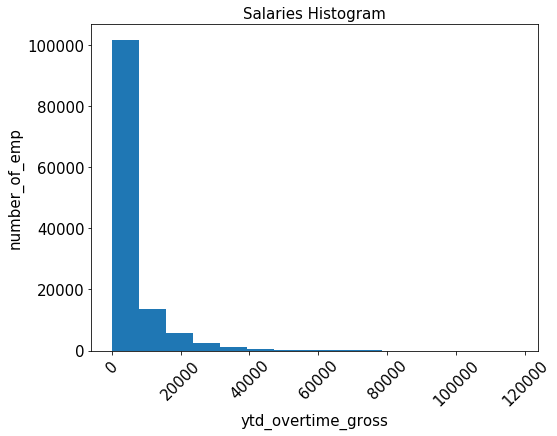

In [18]:
histogram(top_salaries,'ytd_overtime_gross','number_of_emp')

__B9.__ _(2 pts)_ Next up, let's investigate the annual salaries column. Specifically, let's look at a boxplot of this column using `matplotlib.pyplot.plot.boxplot`, as in the Chapter 3 notes. When you apply this function to the salary column describe what you see for outliers in the response box below.

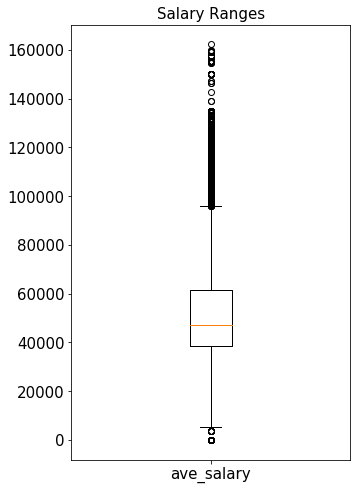

In [19]:
fig = plt.figure(figsize = (5, 8))

_ = plt.boxplot(
    top_salaries["annual_salary"], 
    labels = ["ave_salary"]
)
plt.tick_params(labelsize = 15)

_ = plt.title("Salary Ranges", fontsize = 15)

_Response._

Based on the boxplot above, the IQR of the annual salaries is a little under 40,000, and just above 60,000. This would be the box in the plot area. 
The central box line represent the median which is about 48,000
The low outliers range from 0 to 4,000 while high outliers are anything above 95,0000

__B10.__ _(3 pts)_ Now that we can see the outliers, use the `np.percentile()` function and boolean masks to identify which employees have _high_ outlier salaries. Supposing $IQR$ refers to the size of the interquartile range of this column, utilize the boxplot visualization's criterion for 'outlier':

- Outlier: a point that falls $1.5$ times an $IQR$ distance _above_ the 3rd quartile.

When this is complete, use this boolean mask on our dataframe to print the `.head()` of our outlier employees and see what they do and earn.

In [20]:
IQR = np.percentile(top_salaries["annual_salary"], [25, 75])
print("IQR = ",IQR, '\n')
IQR_size = IQR[1] - IQR[0]
low_outliers = top_salaries[
    top_salaries["annual_salary"] < IQR[0] - IQR_size * 1.5
]["annual_salary"]

high_outliers = top_salaries[
    top_salaries["annual_salary"] > IQR[1] + IQR_size * 1.5
]["annual_salary"]

print("max of low outliners =" , max(low_outliers), '\n')

print("min of high outliners = " ,min(high_outliers), '\n')

print("median salary = ",top_salaries["annual_salary"].median())

high_salaries = top_salaries[top_salaries['annual_salary'].isin(high_outliers)]
high_salaries.head()

IQR =  [38476. 61451.] 

max of low outliners = 3808.0 

min of high outliners =  95974.0 

median salary =  47310.0


,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender
125,183,2016,1,BOZZACCO,GLENN,CHIEF COMPLIANCE OFFICER,COMMON PLEAS COURT,116860.0,0.0,male
140,198,2016,1,LASTER,JEREMIAH,DEPUTY COMMISSIONER,FIRE DEPARTMENT,132911.0,0.0,male
241,128,2016,1,BESSLER,BARRY,PARK PUBLIC RELATIONA & RECREATION DIR,RECREATION DEPARTMENT,97298.0,0.0,male
287,174,2016,1,UNGER,ROSEANNE,CHIEF 1,COMMON PLEAS COURT,104575.0,0.0,female
295,529,2016,1,TOUCHSTONE,MICHAEL,FIRE PARAMEDIC SERVICES CHIEF,FIRE DEPARTMENT,106654.0,0.0,male


__B11.__ (5 pts) Now that we've got a sense of the outliers, let's see if we can up our visualization game. Both the boxplot and histogram provide different information on the structure of the distribution of salaries. It would be great if we could compare these! However, the best comparison will occur if the box is rotated and placed below the histogram so that the location of box, whiskers, etc. falls along (parallel to) the x-axis of the histogram.

In particular, use the `ax = fig.add_subplot(num_rows, num_cols, panel_number)` method on a figure object (the output of `plt.figure()`) to create different axes for the boxplot and histogram, taking care to label axes as needed. Don't forget that your boxplot should be displayed sideways and appear below the histogram!

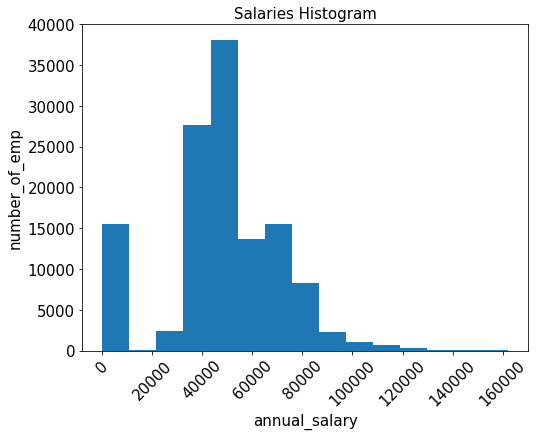

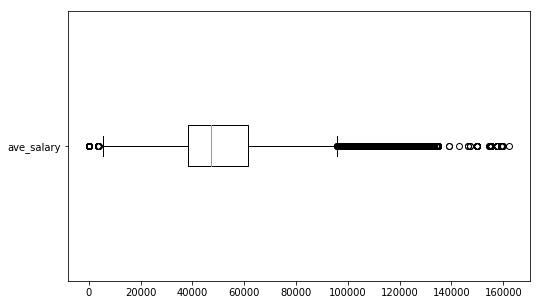

In [21]:
histogram(top_salaries,'annual_salary','number_of_emp')
fig = plt.figure(figsize=(10, 6))
grid = plt.GridSpec(6, 6, hspace=0.2, wspace=0.2)
ax = fig.add_subplot(grid[:-1, 1:])
box = ax.boxplot(
    top_salaries["annual_salary"], 
    labels = ["ave_salary"], vert = False)
plt.gca().invert_yaxis()


__B12.__ _(5 pts)_ Notice that while we know how much the employees earned in gross overtime, it's not entirely clear which individuals have actually _worked_ the most overtime hours. According to [a government guideline](https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/):

> Hourly rates of basic pay are computed by dividing an employee's annual rate of basic pay by 2087 hours.

So, using the assumption that overtime hours are payed out at $1.5$ times an employee's annual salary, compute the number of overtime hours worked by each employee in the dataset and store this in the dataframe under a new column called `'ytd_overtime_gross_hours'`. Be sure to handle remove any NAs or Infs from the result!

When this is complete, print the `.head(25)` of your resulting dataframe, sorted by this new column in descending order. In the response box below answer the following questions:

- Do you think is calculation is generally correct?
- What issues could occur with this overtime hours calculation?
- Do you think all employees are 'full time'?

\[Hint. Assuming these individuals _do_ work full time hours, how many overtime hours _could_ an individual _actually_ work in a year?\] 

In [23]:
top_salaries.loc[:,'ytd_overtime_gross_hours'] = round((top_salaries['ytd_overtime_gross'] / ((top_salaries['annual_salary'] / 2087) * 1.5) ),2)

pd.set_option('use_inf_as_na', True)
top_salaries.dropna(subset=['ytd_overtime_gross_hours'], how='all', inplace = True)
sort_salaries = top_salaries.sort_values(['ytd_overtime_gross_hours'], ascending= False)
sort_salaries.head(25)

C:\Users\joank\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender,ytd_overtime_gross_hours
256043,398122,2017,4,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,15373.20,male,5757.54
202438,208323,2017,3,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,13442.91,male,5034.61
330139,366856,2018,3,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3808.0,8884.70,male,3246.21
277171,334402,2018,2,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,8438.10,male,3160.22
242361,395664,2017,4,NEAL,SHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,97221.21,female,2866.07
113170,114390,2016,4,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3607.0,7222.53,male,2785.96
113697,111990,2016,4,NEAL,SHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,92005.08,female,2712.30
324361,364546,2018,3,POTHEN,KENNY,CORRECTIONAL OFFICER,PHILA. PRISONS,7459.0,13522.89,male,2522.44
245009,394503,2017,4,BYNUM,DONOVAN,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,83196.27,male,2452.62
242768,394804,2017,4,FELIX,BRUCE,CORRECTIONAL OFFICER,PHILA. PRISONS,47310.0,82181.65,male,2416.87


_Response._

_Do you think is calculation is generally correct?_
The calculation is correct is we always assume the basic pay is always based on working the 2,087 hours. Since the data gives us the annual overtime earned, we can determine the overtime rate and overtime hours as shown above

_What issues could occur with this overtime hours calculation?_
When an employee's annal basic pay is less than 2,087, but earned more in overtime, the ratio to determine overtime hours worked will be understated, and in turn overstate the annual overtime hours worked

_Do you think all employees are 'full time'?_
No. It appears some employees earn more overtime pay than basic pay, which implies they are not full time

__B13.__ _(5 pts)_ Our overall interest may be to understand the `'annual_salaries'` column, and one avenue towards understanding this variable is through exploration of relationships with the others. So here's one question we might ask:
        
- Do employees who work overtime have higher salaries? If so how much?

To approach this question, compute and print the correlation between these columns and display a scatter plot. Be sure to accomadate for density in the picture as you interpret. Again, label the axes clearly and provide a title for to support readers. 

When this is complete, discuss any relationship that you see (or don't) between the columns in the response box below.

In [24]:
top_salaries["ytd_overtime_gross"].corr(top_salaries["annual_salary"])

0.15519680989884735

In [25]:
import scipy.stats
corr = scipy.stats.pearsonr(
    top_salaries["ytd_overtime_gross"],top_salaries["annual_salary"]
)[0]
corrstr = "r = " + str(round(corr, 4))
corrstr

'r = 0.1552'

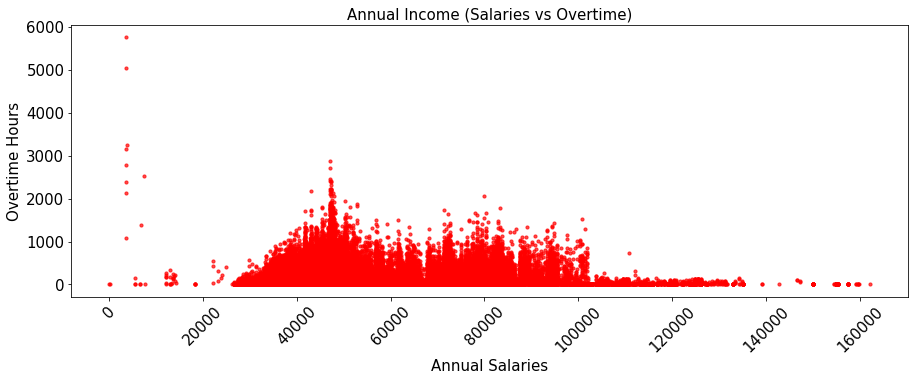

In [26]:
scat_salary = plt.figure(figsize = (15,5))

_  = plt.scatter(
    top_salaries["annual_salary"],top_salaries["ytd_overtime_gross_hours"],
    color = "red", s = 10, alpha = 0.7
)

plt.tick_params(labelsize = 15)

_ = plt.title("Annual Income (Salaries vs Overtime)", fontsize = 15)
_ = plt.ylabel("Overtime Hours", fontsize = 15)
_ = plt.xlabel("Annual Salaries", fontsize = 15)
_ = plt.xticks(rotation = 45)

_Response._ 

Based on the scatter plot, there is little correlation between annual salary and overtime hours. We see that the best fit line is more horizontal across the x axis, and doesnt go higher or lower with increase in salary. This implies that the hours worked overtime is not always dependant on the annual salary of an employee

__B14.__ _(5 pts)_ Now let's explore another hypothesis&mdash;that gender affects to pay. It will be good to  compare similarly-sized groups, so first group the rows by both `'gender'` and `'title'` to observe the gender ratios. 

In particular, use the `.groupby(column_list)` method to create generator of grouped rows. Using the `column_list = ['gender', 'title']` argument will allow extraction of two groups (one for each gender) with a matching `'title'`. Chose one of the top 10 `'title'`s (by greatest number of employees), but make sure there is a _reasonable balance_ of males and females for the profession you choose. Store these two resulting groups from as the `males` and `females` dataframes, print the `.head()` of each. In the response box below state the `'title'` that you chose.

In [27]:
len(top_salaries.title)

110227

In [28]:
column_list = ["gender","title"]
a = top_salaries.groupby(column_list).size().sort_values(ascending = False)
a.head(10)

gender  title                       
male    FIREFIGHTER                     14860
        CORRECTIONAL OFFICER             8902
female  CORRECTIONAL OFFICER             6316
male    FIRE LIEUTENANT                  3058
        FIRE SERV PARAMEDIC              1538
female  LEGAL CLERK 1                    1427
male    PROBATION OFFICER 2              1343
female  PROBATION OFFICER 2              1175
male    FIRE CAPTAIN                     1075
        EMERGENCY MEDICAL TECHNICIAN     1073
dtype: int64

In [29]:
top_title = top_salaries["title"] == "PROBATION OFFICER 2"
top  = top_salaries[top_title]
top_male = top_salaries["gender"] == "male"
top_female = top_salaries["gender"] == "female"

males = top[top_male]
females = top[top_female]

C:\Users\joank\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\joank\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [30]:
print(males.head())

     objectid  calendar_year  quarter     last_name first_name  \
4           5           2016        1          HILL       SEAN   
127       185           2016        1  SCOTT-SEDLEY    ZACHARY   
227       285           2016        1         MOORE     JOSEPH   
286       173           2016        1  MOORE-MATHIS       EVAN   
319       553           2016        1      CHARLTON     MELVIN   

                   title          department  annual_salary  \
4    PROBATION OFFICER 2  COMMON PLEAS COURT        56206.0   
127  PROBATION OFFICER 2  COMMON PLEAS COURT        54461.0   
227  PROBATION OFFICER 2  COMMON PLEAS COURT        56406.0   
286  PROBATION OFFICER 2  COMMON PLEAS COURT        56406.0   
319  PROBATION OFFICER 2  COMMON PLEAS COURT        56206.0   

     ytd_overtime_gross gender  ytd_overtime_gross_hours  
4                   0.0   male                       0.0  
127                 0.0   male                       0.0  
227                 0.0   male                 

In [31]:
print(females.tail())

        objectid  calendar_year  quarter   last_name first_name  \
343968    436856           2018        1   GILLESPIE    KRISTIN   
344006    436894           2018        1       GOREY       TARA   
344028    437954           2018        1    ROBINSON     MONICA   
344084    438010           2018        1  SANTAGUIDA       LOIS   
344133    436959           2018        1    HARGROVE    CYNTHIA   

                      title          department  annual_salary  \
343968  PROBATION OFFICER 2  COMMON PLEAS COURT        58073.0   
344006  PROBATION OFFICER 2  COMMON PLEAS COURT        58273.0   
344028  PROBATION OFFICER 2  COMMON PLEAS COURT        56076.0   
344084  PROBATION OFFICER 2  COMMON PLEAS COURT        58273.0   
344133  PROBATION OFFICER 2  COMMON PLEAS COURT        58073.0   

        ytd_overtime_gross  gender  ytd_overtime_gross_hours  
343968                 0.0  female                       0.0  
344006                 0.0  female                       0.0  
344028     

_Response._ 
The title selected is PROBATION OFFICER 2 since there number of employees split by gender is close. males = 1,343 and females = 1,175 

__B15.__ (2 pts) determine if there is a difference between your male and female salaries on average and discuss the severity of this difference in the response box.

In [32]:
x = round(males.loc[:,"annual_salary"].mean(),2)
y = round(females.loc[:,"annual_salary"].mean(),2)

print('male salary mean = ', x,'\n')
print('female salary mean = ', y,'\n')
print("difference = ", round((y - x),2))

male salary mean =  57671.57 

female salary mean =  57853.49 

difference =  181.92


_Response._ The avarage salaries for the women is slightly lower than the men's average. The difference is about 182 dollars. T

__B16.__ (3 pts) That's a lot of work still to compare two means, and there's a lot of different titles to compare. Grouping `'gender'` against a single other `'title'` is just a comparison of `'gender'` against a single `'title'` category, as opposed to the generalization of comparing `'gender'` across _all_ of the categories in the `'title'` column for the `'annual_salary'` value. It turns out, `pandas` has some very convenient utility for this with the `pd.crosstab()` function:

- ```pd.crosstab(x, y,  values=z, aggfunc = ['mean', 'std', 'count'])```

Here, `x` and `y` will be our two categorical columns to compare, while `z` will be the the numeric column along whose values we wish to observe effects (of the categories). 

Your job is to now apply the `pd.crosstab()` function to the `'title'` and `'gender'` columns (`x` and `y`) with `'annual_salary'` for `values`. The `aggfunc` argument specifies a list of metrics to apply as summary for the columns. For in this assignment, we're just going to use the mean and standard deviation and count (number of rows in the group).

After you run the `pd.crosstab()` function store the resulting dataframe as `avg_salary_gender_v_title`, and prinit/interpret the `.head(25)` in the response box below. Do you see an `'title'`s that you think are worth investigating?

_Response._ I think I would investigate the title "Acting Commissioner/Prisons")

In [34]:
avg_salary_gender_v_title = pd.crosstab(top_salaries.title, top_salaries.gender, 
            values=top_salaries.annual_salary, aggfunc = ['mean', 'std','count'])

avg_salary_gender_v_title.head(25)

mean                 \
gender                                           female           male   
ACCOUNT CLERK                              37066.805755   37932.625000   
ACCOUNTANT                                 50256.363636   54909.823529   
ACCOUNTING MANAGER                                  NaN   87309.090909   
ACCOUNTING SUPERVISOR                      57835.000000   67015.200000   
ACCOUNTING SUPVR                                    NaN   67324.571429   
ACCOUNTING TECHNICIAN 1                    37229.843750   36546.852941   
ACCOUNTING TECHNICIAN 2                    42811.022727   41364.000000   
ACCOUNTING TECHNICIAN 2 TF                 43749.250000   43465.545455   
ACCOUNTING TECHNICIAN III                  46517.642857            NaN   
ACCOUNTING TRANSACTIONS SUPERVISOR         73824.000000            NaN   
ACCTANT/REV EXAMINER/CONTRACT AUDIT TRAIN  39352.000000   39840.333333   
ACTING COMMISSIONER/PRISONS                         NaN  155000.000000   
ADM SECRETARY I                            41014.890909            NaN   
ADM SECRETARY II                           47578.378378   46731.000000   
ADM TECHNICIAN I                           37545.179245   36002.043478   
ADM TECHNICIAN II                          43004.388489   41145.111111   
ADM TECHNICIAN III                         49374.350000   49876.285714   
ADM TECHNICIAN IV                          63379.415094            NaN   
ADMIN ASST NON-CONFIDENTIAL                47972.700000   49715.636364   
ADMIN SPECIALIST 1 - NON-CONFIDENTIAL      46839.818182   44067.833333   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL        60590.764706   53467.200000   
ADMIN SRVCS SUPERVISOR - CONFIDENTIAL      49492.388889            NaN   
ADMIN SRVS SUPERVISOR NON-CONFIDENTIAL     49506.563636   50605.090909   
ADMINISTRATIVE ASSISTANT - CONFIDENTIAL    50585.155556            NaN   
ADMINISTRATIVE OFFICER                     60270.457143            NaN   

                                                   std               count  \
gender                                          female         male female   
ACCOUNT CLERK                              1967.689080  1964.854325  139.0   
ACCOUNTANT                                 4761.705402  8940.140503   22.0   
ACCOUNTING MANAGER                                 NaN   773.075087    NaN   
ACCOUNTING SUPERVISOR                      3286.000000  7251.929929    4.0   
ACCOUNTING SUPVR                                   NaN   998.065271    NaN   
ACCOUNTING TECHNICIAN 1                    1479.229052  1628.162399   32.0   
ACCOUNTING TECHNICIAN 2                     860.593778   811.896193   44.0   
ACCOUNTING TECHNICIAN 2 TF                 1892.709724  2122.085972   44.0   
ACCOUNTING TECHNICIAN III                   453.669417          NaN   14.0   
ACCOUNTING TRANSACTIONS SUPERVISOR         5575.411850          NaN   21.0   
ACCTANT/REV EXAMINER/CONTRACT AUDIT TRAIN   586.000000   605.218198    4.0   
ACTING COMMISSIONER/PRISONS                        NaN     0.000000    NaN   
ADM SECRETARY I                            2087.683163          NaN   55.0   
ADM SECRETARY II                           1054.832039  1365.198197  148.0   
ADM TECHNICIAN I                           1486.803665  1320.029864  106.0   
ADM TECHNICIAN II                          1259.922223  2007.029674  139.0   
ADM TECHNICIAN III                         2084.731821  2142.328293   20.0   
ADM TECHNICIAN IV                          1592.681308          NaN   53.0   
ADMIN ASST NON-CONFIDENTIAL                3141.851750  1398.633535   40.0   
ADMIN SPECIALIST 1 - NON-CONFIDENTIAL      2751.088142  6847.275488   11.0   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL        4280.320181  6132.982710   85.0   
ADMIN SRVCS SUPERVISOR - CONFIDENTIAL      2666.715343          NaN   18.0   
ADMIN SRVS SUPERVISOR NON-CONFIDENTIAL     2956.958834  1748.496086   55.0   
ADMINISTRATIVE ASSISTANT - CONFIDENTIAL    1808.697446          NaN   45.0   
ADMINISTRATIVE OFFICER  

__B17.__ (3 pts) Finally, your job here is to explore the of the 25 `'title'`s with largest difference in average pay between genders using `avg_salary_gender_v_title` dataframe.

To start, drop any rows/`'title'`s for which there are NAs. Then, compute an additional columns called `'absolute_difference'`, containinig the absolute value of the differences between the male and female columns. Next, `.sort(ascending = False)` the modified `avg_salary_gender_v_title` dataframe by the new `'absolute_difference'` column and store the resultinig `.head(25)` as `top_25` and print the result.

When this is done, discuss in the response box below an observations about these most widely varying salaries averages? Does the standard deviation help to glean any other information?

In [46]:
av_gen_v_titl = avg_salary_gender_v_title.dropna()
av_gen_v_titl['mean', 'absolute_difference'] =  abs(av_gen_v_titl['mean']['female'] - av_gen_v_titl['mean']['male'])
av_gen_v_titl['std', 'absolute_difference'] =  abs(av_gen_v_titl['std']['female'] - av_gen_v_titl['std']['male'])
av_gen_v_titl['count', 'absolute_difference'] =  abs(av_gen_v_titl['count']['female'] - av_gen_v_titl['count']['male'])
av_gen_v_titl = av_gen_v_titl.sort_values(by= ('mean','absolute_difference'),ascending = False)

top_25 = av_gen_v_titl.reset_index().head(25)
top_25

C:\Users\joank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\joank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\joank\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

index           mean                 \
gender                                                  female           male   
0       LABOR,PROCUREMENT & LITIGATION ATTORNEY   74100.000000  116860.000000   
1                             SENIOR ACCOUNTANT   75152.318182   54983.000000   
2                     PARKS OPERATIONS DIRECTOR   95136.818182  108890.363636   
3         PARKS & RECREATION OPERATIONS MANAGER   82024.846154   72203.300000   
4                      ADMINISTRATIVE TRAINEE 2   44875.000000   35099.000000   
5                         ACCOUNTING SUPERVISOR   57835.000000   67015.200000   
6                      ADMINISTRATIVE SCIENTIST   90367.000000   99378.878788   
7                 ARCHITECTURAL PROJECT COORD 1   43417.500000   52130.666667   
8                   OLDER ADULT CENTER DIRECTOR   67076.100000   75384.909091   
9                 ARCHITECTURAL PROJECT COORD 2   57203.666667   64416.363636   
10          ADMIN SPECIALIST 2 NON-CONFIDENTIAL   60590.764706   53467.200000   
11                             CASE INTERVIEWER   33780.775194   40693.754098   
12       HUMAN RESOURCE PROFESSIONAL (CP10-19A)   55704.357143   48861.777778   
13                                      CHIEF 1  108466.851852  101818.437500   
14                          DEPUTY COMMISSIONER  124296.439394  130536.019608   
15              ENVIRONMENTAL EDUCATION PLANNER   51506.437500   45552.272727   
16               HUMAN RESOURCES PROFESSIONAL 2   62340.000000   56457.696970   
17                   DEPUTY PRISON COMMISSIONER  119469.363636  125123.285714   
18           UTILITY FINANCIAL SERVICES MANAGER   99599.428571  105195.000000   
19             COMMUNITY INITIATIVES SPECIALIST   47737.481481   53058.030303   
20      GEOGRAPHIC INFORMATION SYS SPECIALIST 3   79667.000000   74597.055556   
21                                      CHIEF 2  123040.000000  118034.406780   
22                PUBLIC RELATIONS SPECIALIST 2   51446.111111   56433.714286   
23               DEPARTMENTAL INVENTORY MANAGER   67975.047619   62996.142857   
24                                   ACCOUNTANT   50256.363636   54909.823529   

                 std                count                       mean  \
gender        female          male female   male absolute_difference   
0           0.000000      0.000000    4.0    8.0        42760.000000   
1        2164.066023      0.000000   22.0    2.0        20169.318182   
2        4628.839440   2374.650386   11.0   11.0        13753.545455   
3        1795.946308   7657.687906   13.0   40.0         9821.546154   
4         758.638254      0.000000    3.0    2.0         9776.000000   
5        3286.000000   7251.929929    4.0    5.0         9180.200000   
6        4756.116588   2469.763472    5.0   33.0         9011.878788   
7        1665.236470   3538.311330    2.0    6.0         8713.166667   
8        6687.894605   3062.251768   40.0   11.0         8308.809091   
9        3325.777578   3121.826269    9.0   11.0         7212.696970   
10       4280.320181   6132.982710   85.0   25.0         7123.564706   
11       1015.368685   8204.861446  129.0   61.0         6912.978905   
12       7417.016076   8606.963272   14.0   18.0         6842.579365   
13       1705.541640   4910.122741   27.0   16.0         6648.414352   
14      17213.748466  16783.139901   66.0  102.0         6239.580214   
15       5911.005114   3225.165270   16.0   11.0         5954.164773   
16       4507.195913   5959.476741   13.0   33.0         5882.303030   
17       9365.787466   3026.641740   11.0   14.0         5653.922078   
18       5494.286987   2858.000000   14.0    4.0         5595.571429   
19       5832.649394   1153.361324   27.0   33.0         5320.548822   
20       1547.149637   6020.932999    8.0   18.0         5069.944444   
21       5250.000000   4896.496566    4.0   59.0         5005.593220   
22       4607.947915   4380.409068   18.0   14.0         4987.603175   
23       1413.008616   6158.807622   21.0   21.0      

_Response._

The salary average vary a lot depending on department. Some are as low as 40,000, some avarages are as high as 120,000. The std deviation can be used to accurately measure how different these means vary by department

__B18.__ _(2 pts)_ Finally, take your `top_25` largest-difference `'title'`s and display them using a side-by-side barplot. To conveniently do this, we can use the `.plot(kind = 'bar')` on our `['mean']` column in the `top_25` data frame. 

Use the dataframe `.plot()` method, since this `pandas` method for a barplot is really just wrapping `matplotlib`'s `pyplot`. This means we can use `pyplot`/`matpltlib` (proper) commands for many things like the `plt.title()`, but to make the figure size nice we have the pass the `figsize=(x_inches,y_inches)` argument to the dataframe `.plot()` method. So, as is necessary make this visualization look nice to ease your discussion (above)!

Text(0.5, 0, 'Departments')

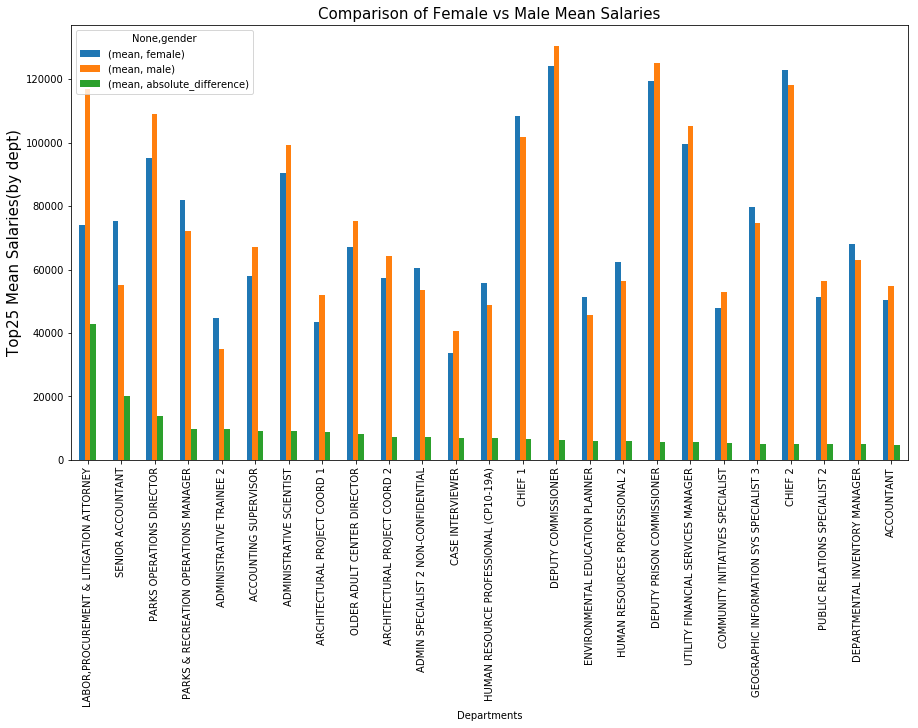

In [40]:
p = top_25.plot(kind = 'bar', x = ['index'][0],y = ['mean'],figsize = (15,8))
plt.title("Comparison of Female vs Male Mean Salaries", fontsize = 15)
plt.ylabel("Top25 Mean Salaries(by dept)", fontsize = 15)
plt.xlabel("Departments", fontsize = 10)